In [146]:
# Working with custom datasets

import torch
from torch import nn

In [147]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [148]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data")
image_path = data_path/"pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists...")
else:
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print(f"Downloading pizza, steak, sushi data...")
        f.write(request.content)

    with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping data...")
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists...


In [149]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [150]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'


In [151]:
train_dir = image_path / "train"
test_dir = image_path/ "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

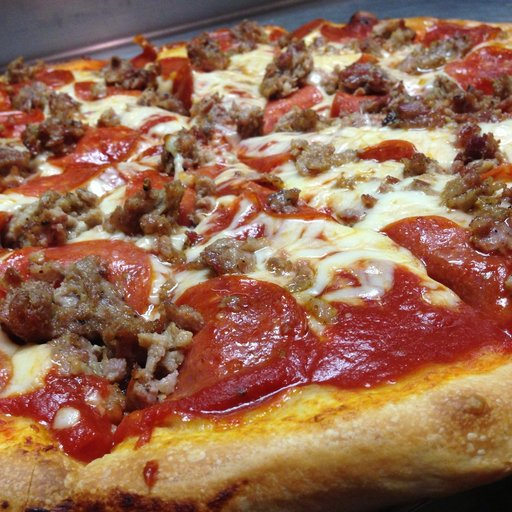

In [152]:
from PIL import Image
import random

torch.manual_seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

img

(-0.5, 511.5, 511.5, -0.5)

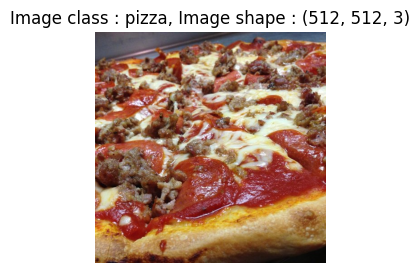

In [153]:
import matplotlib.pyplot as plt
import numpy as np


# Converting image to a numpy array

image_array = np.asarray(img)

plt.figure(figsize=(5,3))
plt.imshow(image_array)
plt.title(f"Image class : {image_class}, Image shape : {image_array.shape}")
plt.axis(False)

In [154]:
# Transforming data

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [155]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [156]:
image_array

array([[[ 76,  67,  72],
        [ 76,  67,  72],
        [ 75,  66,  71],
        ...,
        [ 72,  86, 121],
        [ 73,  87, 122],
        [ 72,  86, 121]],

       [[ 75,  66,  71],
        [ 74,  65,  70],
        [ 73,  64,  69],
        ...,
        [ 69,  84, 117],
        [ 70,  85, 118],
        [ 71,  86, 119]],

       [[ 73,  66,  73],
        [ 73,  66,  73],
        [ 72,  65,  72],
        ...,
        [ 67,  84, 112],
        [ 69,  86, 114],
        [ 70,  87, 115]],

       ...,

       [[142,  83,  39],
        [128,  71,  28],
        [117,  61,  24],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]],

       [[136,  74,  27],
        [125,  64,  19],
        [119,  60,  16],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]],

       [[149,  85,  37],
        [141,  79,  30],
        [138,  77,  32],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]]

In [157]:
data_transform(img)

tensor([[[0.2902, 0.3020, 0.3020,  ..., 0.2745, 0.2824, 0.2941],
         [0.2902, 0.3020, 0.3098,  ..., 0.3216, 0.3294, 0.3333],
         [0.2902, 0.3059, 0.3137,  ..., 0.4392, 0.4510, 0.4627],
         ...,
         [0.6902, 0.6784, 0.6863,  ..., 0.0314, 0.0314, 0.0275],
         [0.5451, 0.6157, 0.6392,  ..., 0.0275, 0.0275, 0.0314],
         [0.4039, 0.5412, 0.5490,  ..., 0.0275, 0.0275, 0.0275]],

        [[0.2667, 0.2784, 0.2824,  ..., 0.3529, 0.3569, 0.3686],
         [0.2784, 0.2941, 0.2980,  ..., 0.4078, 0.4118, 0.4157],
         [0.2863, 0.3059, 0.3137,  ..., 0.4627, 0.4745, 0.4824],
         ...,
         [0.5647, 0.5529, 0.5490,  ..., 0.0314, 0.0314, 0.0275],
         [0.3804, 0.4667, 0.4863,  ..., 0.0314, 0.0275, 0.0314],
         [0.2118, 0.3686, 0.3647,  ..., 0.0314, 0.0275, 0.0275]],

        [[0.2902, 0.3020, 0.3059,  ..., 0.4588, 0.4667, 0.4667],
         [0.3176, 0.3294, 0.3373,  ..., 0.5098, 0.5176, 0.5098],
         [0.3294, 0.3490, 0.3608,  ..., 0.5098, 0.5098, 0.

In [158]:
data_transform_alternate = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


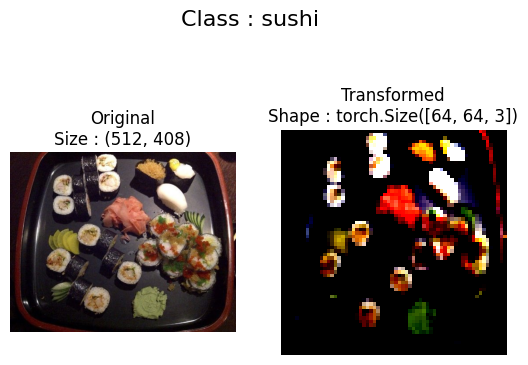

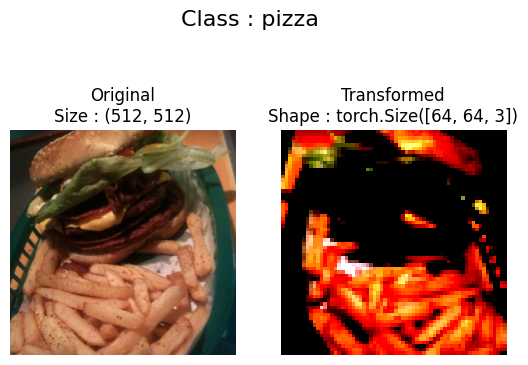

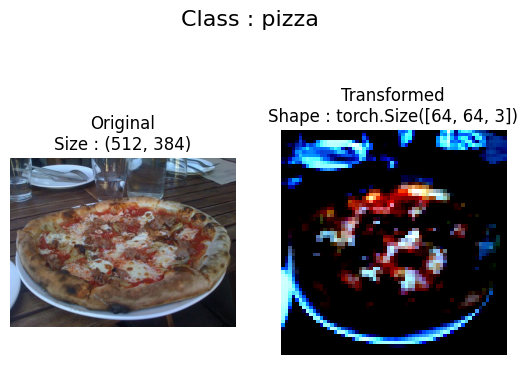

In [159]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:

            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize : {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape : {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class : {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_paths=image_path_list, transform=data_transform_alternate, seed=42)

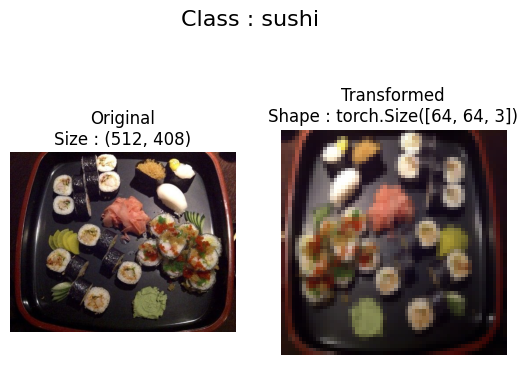

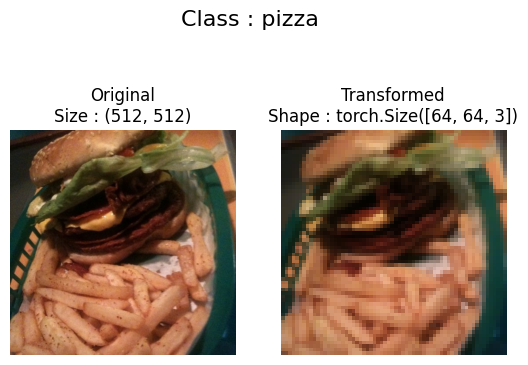

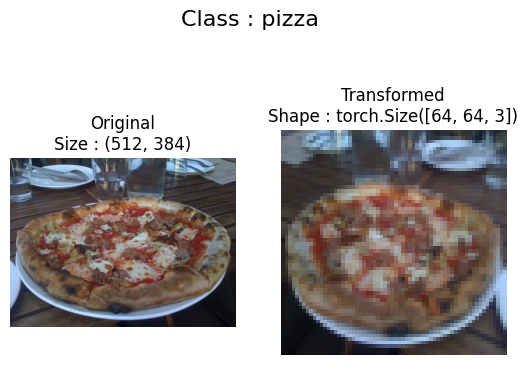

In [160]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform, seed=42)

In [162]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [164]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [165]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [175]:
img, label = train_data[0]
img.shape, label, class_names[label]

(torch.Size([3, 64, 64]), 0, 'pizza')

(-0.5, 63.5, 63.5, -0.5)

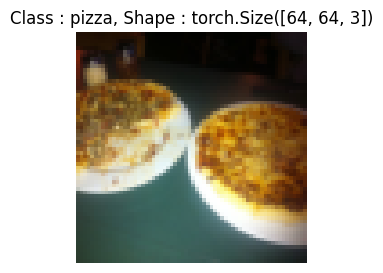

In [179]:
plt.figure(figsize=(4,3))
plt.imshow(img.permute(1,2,0))
plt.title(f"Class : {class_names[label]}, Shape : {img.permute(1,2,0).shape}")
plt.axis(False)